<a href="https://colab.research.google.com/github/m3llad0/TC3007C/blob/master/preprocesamiento_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.arima.model import ARIMA
from zipfile import ZipFile


# Serie temporal ARIMA

A continuación se realizará el preprocesamiento antes de construir un modelo temporal ARIMA, el set de datos usado será un compendio de información sobre criptomonedas. 

In [51]:
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d zsinghrahulk/crypto-currency-bitcoin-and-ethereum-data

with ZipFile('crypto-currency-bitcoin-and-ethereum-data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

!rm crypto-currency-bitcoin-and-ethereum-data.zip

cp: cannot stat 'kaggle.json': No such file or directory


100%|█████████████████████████████████████████| 117k/117k [00:00<00:00, 956kB/s]
100%|█████████████████████████████████████████| 117k/117k [00:00<00:00, 952kB/s]


In [54]:
# Cargar set de datos
df = pd.read_csv('ETH-BTC-USD.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume,Currency
Date,,,,,,,
2018-11-14,206.533997,207.044998,174.084000,181.397003,181.397003,2.595330e+09,Etherium
2018-11-15,181.899002,184.251007,170.188995,180.806000,180.806000,2.638410e+09,Etherium
2018-11-16,180.865005,181.350006,173.126007,175.177002,175.177002,2.015330e+09,Etherium
2018-11-17,175.360001,175.850998,172.869003,174.001007,174.001007,1.832800e+09,Etherium
2018-11-18,174.175003,179.151993,174.175003,177.067001,177.067001,1.810920e+09,Etherium


## Selección de variables

En el set de datos se pueden encontrar datos sobre **Etherium** y **Bitcoin**, para el análisis nos enfocaremos únicamente en el **Etherium** para realizar el preprocesamiento de los datos.

In [75]:
currency_of_interest = 'Etherium'

df_ethereum = df[df['Currency'] == currency_of_interest]

df_ethereum = df_ethereum.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Currency'])

print(df_ethereum.head())

                 Close
Date                  
2018-11-14  181.397003
2018-11-15  180.806000
2018-11-16  175.177002
2018-11-17  174.001007
2018-11-18  177.067001


## Visualización de la serite temporal

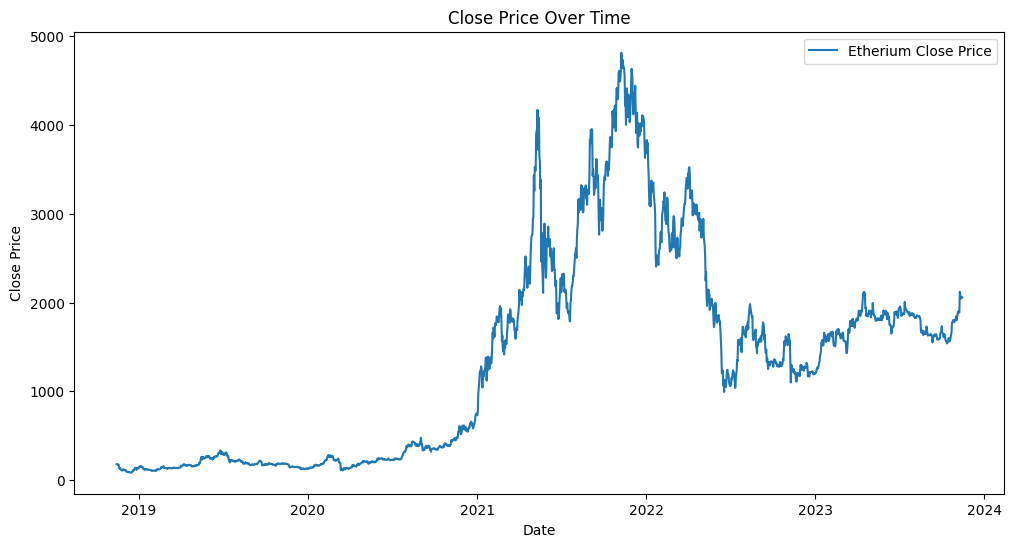

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(df_ethereum, label=f'{currency_of_interest} Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [90]:
result_adf = adfuller(df_ethereum['Close'])
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')

ADF Statistic: -1.494632557843634
p-value: 0.5361648450748814


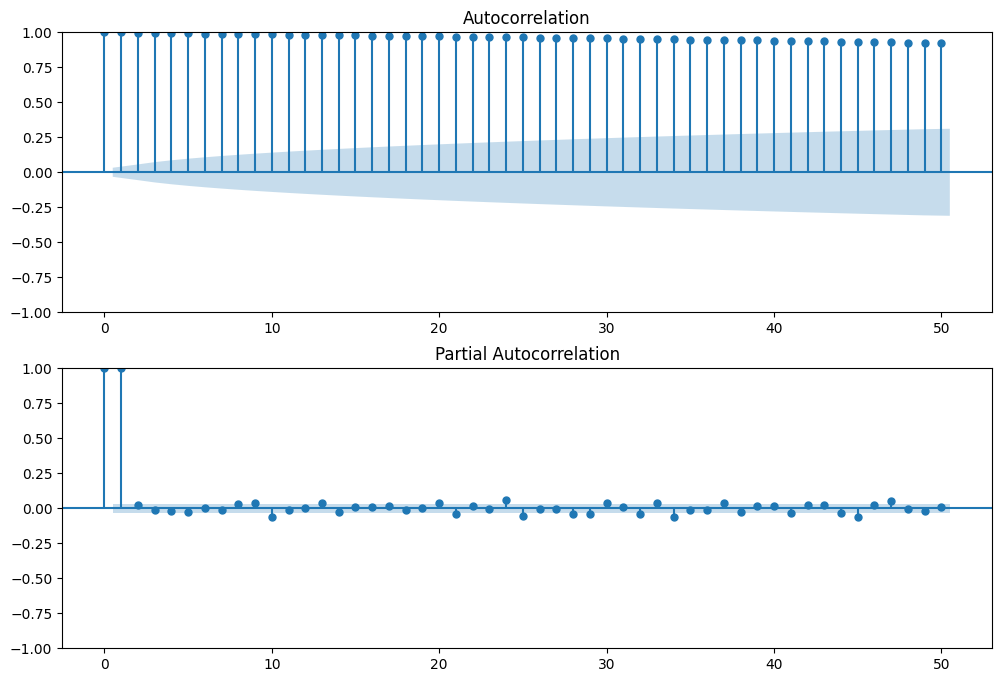

In [84]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Close'], lags=50, ax=ax1)
plot_pacf(df['Close'], lags=50, ax=ax2)
plt.show()

In [96]:
#Verificar valores NaN

print("Valores NaN en la serie de datos origial: ", df_ethereum['Close'].isnull().sum())

Valores NaN en la serie de datos origial:  0


In [95]:
#Diferenciación de los datos

df_ethereum['Close_diff'] = df_ethereum['Close'].diff().dropna()

df_ethereum['Close_diff']

Date
2018-11-14          NaN
2018-11-15    -0.591003
2018-11-16    -5.628998
2018-11-17    -1.175995
2018-11-18     3.065994
                ...    
2023-11-10   -42.271240
2023-11-11   -25.575928
2023-11-12    -7.526855
2023-11-13    10.078369
2023-11-14     4.165771
Name: Close_diff, Length: 1827, dtype: float64

Text(0, 0.5, 'Difernecia de precios')

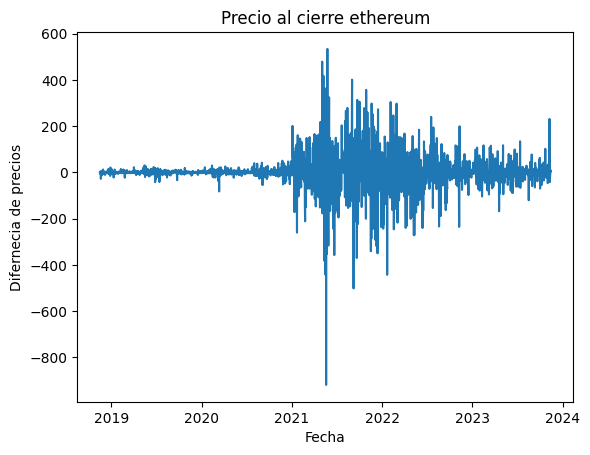

In [98]:
#visualización serie diferenciada
plt.plot(df_ethereum['Close_diff'])
plt.title("Precio al cierre ethereum")
plt.xlabel("Fecha")
plt.ylabel("Difernecia de precios")

In [100]:
#Prueba de estacionariedad

result_diff = adfuller(df_ethereum['Close_diff'].dropna())
print("Estadisticas prueba ADF después de diferenciación", result_adf[0])
print("Valores p después de diferenciación: ", result_adf[1])

Estadisticas prueba ADF después de diferenciación -1.494632557843634
Valores p después de diferenciación:  0.5361648450748814


In [ ]:
()